In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd



In [2]:
# x = np.array([2, 7])
# y = np.array([5, 15])
# slope, intercept, r_value, p_value, std_err = linregress(x, y)
# print("slope: %f, intercept: %f" % (slope, intercept))
# print("Rsquared: %f" % r_value**2)
# slope: 2.000000 
# intercept: 1.000000
# Rsquared: 1.000000
  
# plt.figure(figsize=(15, 5))
# plt.plot(x, y, 'o', label='original data')
# plt.plot(x, intercept + slope*x, 'r', label='fitted line')
# plt.legend()
# plt.grid()
# plt.show()

In [3]:
df=pd.read_csv('data/4h/ATOM_BUSD_4h_111.csv', index_col='Time')
df['Number'] = np.arange(len(df))+1
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/4h/ATOM_BUSD_4h_111.csv'

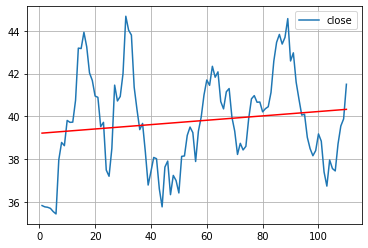

In [ ]:
y = df.High
x = df.Number

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, y, label="close")
plt.plot(x, m * x + b, color="red")   # I've added a color argument here

# plt.savefig("figure.png")

# # draw the closing price and related trendlines (uptrend and downtrend)
# fig, ax1 = plt.subplots(figsize=(15,10))

# color = 'tab:green'
# xdate = [x for x in df.index]
# ax1.set_xlabel('Date', color=color)
# ax1.plot(xdate, df.Close, label="close", color=color)
# ax1.tick_params(axis='x', labelcolor=color)
# ax1.legend()

# ax2 = ax1.twiny() # ax2 and ax1 will have common y axis and different x axis, twiny
# ax2.plot(df.Number, df.high, label="uptrend")
# # ax2.plot(df.Number, df.Downtrend, label="downtrend")

plt.legend()
plt.grid()
plt.show()

In [ ]:
np.seterr(over='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
# higher points are returned
df_high = df[['High', 'Number', 'Close']]
df_low = df[['Low', 'Number', 'Close']]

# higher points are returned
while len(df_high)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df_high['Number'], y=df_high['High'])
    df_high = df_high.loc[df_high['High'] > slope * df_high['Number'] + intercept]
    
df_high.tail()

# lower points are returned
while len(df_low)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df_low['Number'], y=df_low['Low'])
    df_low = df_low.loc[df_low['Low'] < slope * df_low['Number'] + intercept]
    
df_low.tail()

,Low,Number,Close
Time,,,
2022-01-10 12:00:00,32.94,50,36.38


In [ ]:


stats= linregress(x=df_high['Number'], y=df_high['Close'])
m = stats.slope
b = stats.intercept
df['Uptrend'] = m * df['Number'] + b

stats2 = linregress(x=df_low['Number'], y=df_low['Close'])

df['Downtrend'] = stats2.slope * df['Number'] + stats2.intercept

df.tail()

c:\Users\Grant\virenv\fintech\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
c:\Users\Grant\virenv\fintech\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\Grant\virenv\fintech\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


,Open,High,Low,Close,Volume,Number,Uptrend,Downtrend
Time,,,,,,,,
2022-01-19 20:00:00,37.34,37.45,36.35,37.04,39514.98,106,NaN,NaN
2022-01-20 00:00:00,37.10,38.71,36.95,38.54,93703.62,107,NaN,NaN
2022-01-20 04:00:00,38.62,39.55,38.27,39.45,84846.39,108,NaN,NaN
2022-01-20 08:00:00,39.44,39.88,38.83,39.33,69988.60,109,NaN,NaN
2022-01-20 12:00:00,39.38,41.50,39.01,41.31,137428.17,110,NaN,NaN


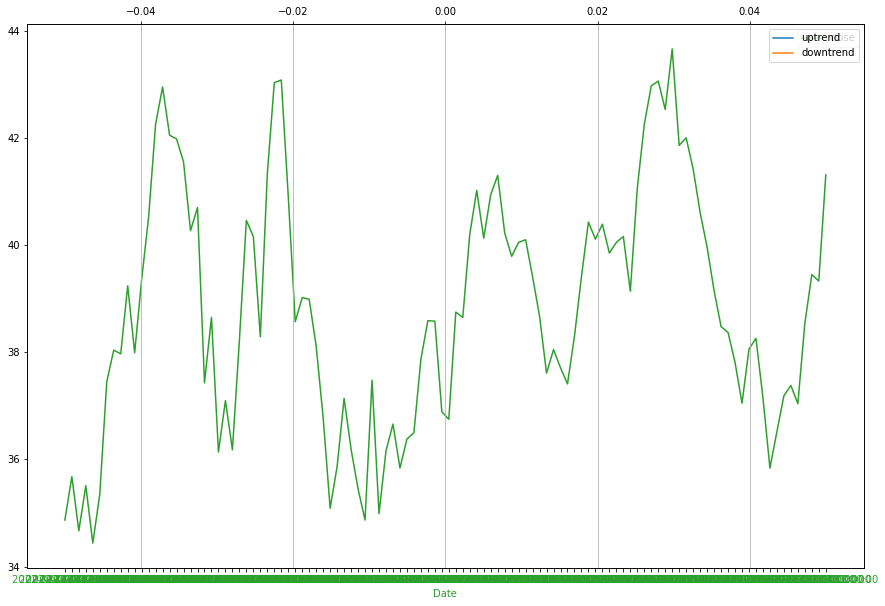

In [ ]:
# draw the closing price and related trendlines (uptrend and downtrend)
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:green'
xdate = [x for x in df.index]
ax1.set_xlabel('Date', color=color)
ax1.plot(xdate, df.Close, label="close", color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.legend()

ax2 = ax1.twiny() # ax2 and ax1 will have common y axis and different x axis, twiny
ax2.plot(df.Number, df.Uptrend, label="uptrend")
ax2.plot(df.Number, df.Downtrend, label="downtrend")

plt.legend()
plt.grid()
plt.show()

In [ ]:
df

,Open,High,Low,Close,Volume,Number,Uptrend,Downtrend
Time,,,,,,,,
2022-01-02 08:00:00,35.69,35.83,34.71,34.87,57858.79,1,NaN,NaN
2022-01-02 12:00:00,34.91,35.77,34.62,35.68,68616.61,2,NaN,NaN
2022-01-02 16:00:00,35.62,35.75,34.23,34.67,75490.93,3,NaN,NaN
2022-01-02 20:00:00,34.69,35.70,34.65,35.51,52989.59,4,NaN,NaN
2022-01-03 00:00:00,35.52,35.55,34.24,34.44,47059.23,5,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-01-19 20:00:00,37.34,37.45,36.35,37.04,39514.98,106,NaN,NaN
2022-01-20 00:00:00,37.10,38.71,36.95,38.54,93703.62,107,NaN,NaN
2022-01-20 04:00:00,38.62,39.55,38.27,39.45,84846.39,108,NaN,NaN
